# **Violence Risk Assesment**
This project was made using "Domestic Violence in Spain 2003 - 2017" as the domain of dataset. Adjusment is done by removing some unrelated features to know the risk of violence to women or child. - **Bangkit Capstone Project**

# **About Project**
- This project aims to build a Machine Learning Algorithm to predict risk that might be occured to women or child that be the victim of violence.
- The domain of dataset that used in this project come from "Domestic Violence in Spain 2003 - 2017" that can be downloaded here: [Domestic Violence in Spain Dataset](https://data.world/pablosdt/domestic-violence-in-spain).
- The domain dataset was clustered and feature engineering are done to make the dataset more related to identify the risk of violence that happen to women or child.
- For the next development, suggested to get more feature that can be used by the model to improve the performance of the violence risk identification.

# **Cluster Label Legend**
- Cluster 1 - Higher Risk
- Cluster 0 - Moderate Risk
- Cluster 2 - Lower Risk

# Import Library

In [ ]:
# Exploratory Data Analysis
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats


# Model Development
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
## Machine Learning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer
## Deep Learning 
import tensorflow as tf

# Load Dataset

In [ ]:
vra_dset = pd.read_csv('/content/drive/MyDrive/Bangkit Academy/Final Project - Capstone/03 Dataset/vra_spn_dset/violence_risk_assessment_dataset.csv')
vra_dset.head()

,Relation,Victim Age,Agressor Age,Previous Abuse Report,Living Together,cluster
0,Family,41-50 years,51-64 years,Unknown,Yes,0
1,Family,75-84 years,75-84 years,Unknown,Yes,2
2,Family,21-30 years,Unknown,Unknown,Yes,2
3,Family,31-40 years,Unknown,Unknown,Yes,2
4,Stranger,31-40 years,Unknown,Unknown,No,2


# Exploratory Data Analysis

## Sample Data

In [ ]:
vra_dset.sample(5)

,Relation,Victim Age,Agressor Age,Previous Abuse Report,Living Together,cluster
204,Stranger,31-40 years,31-40 years,No,No,1
14,Stranger,31-40 years,Unknown,Unknown,No,2
352,Family,41-50 years,41-50 years,No,Yes,0
282,Family,31-40 years,31-40 years,Yes,No,1
223,Family,65-74 years,Unknown,No,Yes,2


## Data Information

In [ ]:
vra_dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Relation               900 non-null    object
 1   Victim Age             900 non-null    object
 2   Agressor Age           900 non-null    object
 3   Previous Abuse Report  900 non-null    object
 4   Living Together        900 non-null    object
 5   cluster                900 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 42.3+ KB


## Univariate Analysis

### Missing Value Identification

In [ ]:
vra_dset.isna().any()

Relation                 False
Victim Age               False
Agressor Age             False
Previous Abuse Report    False
Living Together          False
cluster                  False
dtype: bool

### Duplicated Data Identification

In [ ]:
# Check if there are Duplicated Data or Not
duplicated_df = vra_dset[vra_dset.duplicated()]
# Show Number of Duplicated Data
print('Main Dataset : {}'.format(vra_dset.shape))
print('Duplicated Data : {}'.format(duplicated_df.shape))
print('--------------------------------------')
print('Unique Data : {}'.format(vra_dset.shape[0]-duplicated_df.shape[0]))
print('--------------------------------------')

Main Dataset : (900, 6)
Duplicated Data : (695, 6)
--------------------------------------
Unique Data : 205
--------------------------------------


In [ ]:
# Remove Duplicated Data
vra_dset = vra_dset.drop_duplicates(keep='last').reset_index(drop=True)
print('Number of Data After Removing Duplicates: {}\n'.format(vra_dset.shape))
vra_dset.head()


Number of Data After Removing Duplicates: (205, 6)



,Relation,Victim Age,Agressor Age,Previous Abuse Report,Living Together,cluster
0,Family,31-40 years,51-64 years,Unknown,Yes,0
1,Stranger,51-64 years,41-50 years,Unknown,No,0
2,Family,Unknown,31-40 years,Unknown,Yes,0
3,Stranger,18-20 years,Unknown,Unknown,No,2
4,Stranger,51-64 years,Unknown,Unknown,No,2


### Outliers Identification


In [ ]:
# Relation Values
relation_enc = {
    'Family':0, 
    'Stranger':1, 
    'Acquaintance':2
}

# Victim Age Values
vic_enc = {
    '<16 years':0, 
    '16-17 years':1, 
    '18-20 years':2, 
    '21-30 years':3, 
    '31-40 years':4, 
    '41-50 years':5, 
    '51-64 years':5, 
    '65-74 years':6, 
    '75-84 years':7, 
    '>85 years':8,
    'Unknown':9
}

# Agressor Age Values
agr_enc = {
    '<16 years':0, 
    '16-17 years':1, 
    '18-20 years':2, 
    '21-30 years':3, 
    '31-40 years':4, 
    '41-50 years':5, 
    '51-64 years':5, 
    '65-74 years':6, 
    '75-84 years':7, 
    '>85 years':8,
    'Unknown':9
}

# Previous Abuse Report Values
par_enc = {
    'Yes':0, 
    'No':1, 
    'Unknown':2
}

# Living Together Values
lt_enc = {
    'Yes':0, 
    'No':1, 
    'Unknown':2
}

In [ ]:
# Copy vra_dset
encoded_vra_dset = vra_dset.copy()

# Encoding Categorical Value
enc_dict = [relation_enc, vic_enc, agr_enc, par_enc, lt_enc]
feat = encoded_vra_dset.columns.tolist()
for i in range(5):
  encoded_vra_dset[feat[i]] = encoded_vra_dset[feat[i]].replace(enc_dict[i])
print(encoded_vra_dset.shape)
encoded_vra_dset.head()

(205, 6)


,Relation,Victim Age,Agressor Age,Previous Abuse Report,Living Together,cluster
0,0,4,5,2,0,0
1,1,5,5,2,1,0
2,0,9,4,2,0,0
3,1,2,9,2,1,2
4,1,5,9,2,1,2


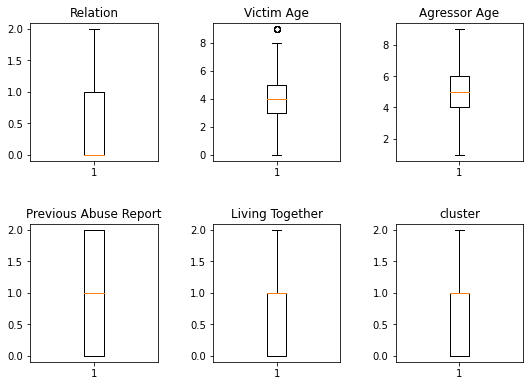

In [ ]:
# Identifying Existing Outliers
features = encoded_vra_dset.columns
feat_iter = 0

fig, ax = plt.subplots(2, 3, figsize=(8,6))
for row in range(2):
  for col in range(3):
    ax[row][col].boxplot(encoded_vra_dset[features[feat_iter]])
    ax[row][col].title.set_text(features[feat_iter])
    feat_iter+=1
plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
# Removing Outliers
# Get ZScore
zscore = stats.zscore(encoded_vra_dset)

# Eliminating Outliers
encoded_vra_dset = encoded_vra_dset[(np.abs(zscore) < 3).all(axis=1)].reset_index(drop=True)
print('Number of Data After Eliminating Outliers: {}'.format(encoded_vra_dset.shape))

Number of Data After Eliminating Outliers: (205, 6)


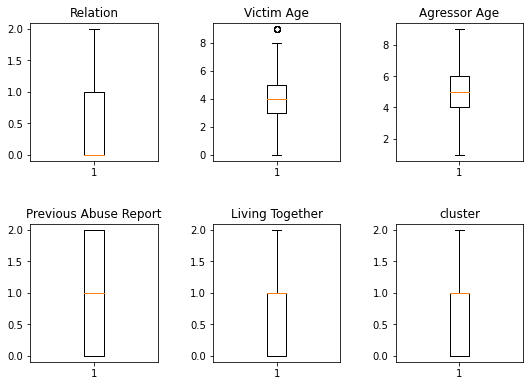

In [ ]:
# Check Outliers
features = encoded_vra_dset.columns
feat_iter = 0

fig, ax = plt.subplots(2, 3, figsize=(8,6))
for row in range(2):
  for col in range(3):
    ax[row][col].boxplot(encoded_vra_dset[features[feat_iter]])
    ax[row][col].title.set_text(features[feat_iter])
    feat_iter+=1
plt.tight_layout(pad=3.0)
plt.show()

### Dataset Statistics Descriptive

In [ ]:
encoded_vra_dset.describe()

,Relation,Victim Age,Agressor Age,Previous Abuse Report,Living Together,cluster
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.482927,4.341463,5.043902,1.009756,0.570732,0.756098
std,0.646219,1.677559,1.895046,0.747481,0.505966,0.746905
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000
50%,0.000000,4.000000,5.000000,1.000000,1.000000,1.000000
75%,1.000000,5.000000,6.000000,2.000000,1.000000,1.000000
max,2.000000,9.000000,9.000000,2.000000,2.000000,2.000000


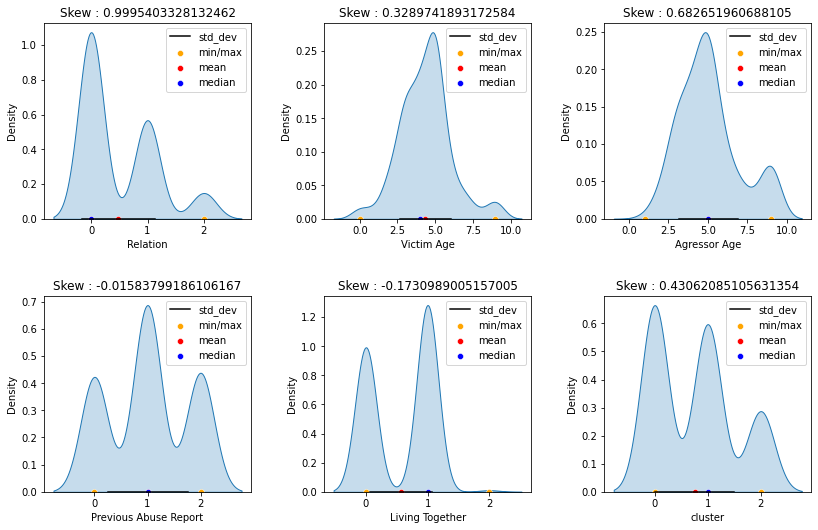

In [ ]:
features = encoded_vra_dset.columns
feat_iter = 0

fig, ax = plt.subplots(2, 3, figsize=(12,8))
for row in range(2):
  for col in range(3):
    sns.kdeplot(encoded_vra_dset[features[feat_iter]], shade=True, ax=ax[row][col])
    points = encoded_vra_dset[features[feat_iter]].describe()['mean']-encoded_vra_dset[features[feat_iter]].describe()['std'], encoded_vra_dset[features[feat_iter]].describe()['mean']+encoded_vra_dset[features[feat_iter]].describe()['std']
    sns.lineplot(x=points, y=[0,0], color = 'black', label = "std_dev", ax=ax[row][col])
    sns.scatterplot(x=encoded_vra_dset[features[feat_iter]].describe()[['min','max']], y=[0,0], color = 'orange', label = "min/max", ax=ax[row][col])
    sns.scatterplot(x=encoded_vra_dset[features[feat_iter]].mean(), y=[0], color = 'red', label = "mean", ax=ax[row][col])
    sns.scatterplot(x=encoded_vra_dset[features[feat_iter]].median(), y=[0], color = 'blue', label = "median", ax=ax[row][col])
    ax[row][col].title.set_text('Skew : {}'.format(encoded_vra_dset[features[feat_iter]].skew()))
    feat_iter += 1

plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
columns = encoded_vra_dset.columns
columns = columns[:-1]

mean_list_0 = []
for col in columns:
  mean_list_0.append(encoded_vra_dset[encoded_vra_dset.cluster == 0][col].mean())

mean_list_1 = []
for col in columns:
  mean_list_1.append(encoded_vra_dset[encoded_vra_dset.cluster == 1][col].mean())

mean_list_2 = []
for col in columns:
  mean_list_2.append(encoded_vra_dset[encoded_vra_dset.cluster == 2][col].mean())

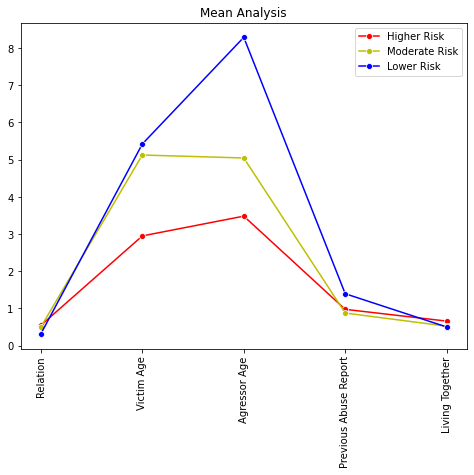

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=columns, y=mean_list_1,  marker="o", label='Higher Risk', color='r')
sns.lineplot(x=columns, y=mean_list_0,  marker="o", label='Moderate Risk', color='y')
sns.lineplot(x=columns, y=mean_list_2,  marker="o", label='Lower Risk', color='b')
plt.xticks(rotation = 90)
plt.title('Mean Analysis')
plt.legend()
plt.show()

## Bivariate Analysis

### Overall Features Correlation Analysis

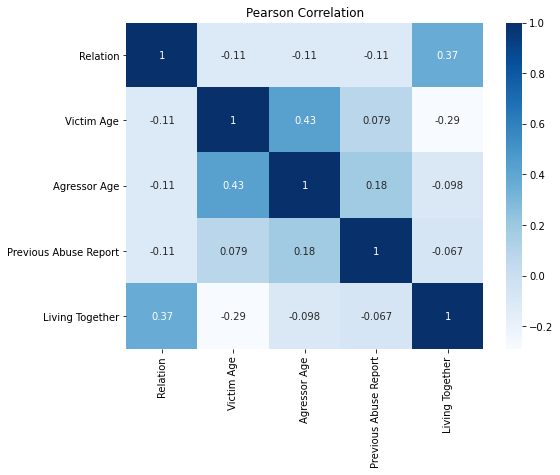

In [ ]:
encoded_vra_dset_corr = encoded_vra_dset.drop(columns=['cluster']).corr(method='pearson')

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(encoded_vra_dset_corr, annot=True, cmap='Blues')
plt.title('Pearson Correlation')
plt.show()

In [ ]:
# Highly Correlated Features
def high_corr(corr_matrix, threshold):
  col_high_corr = set()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j] > threshold):
        col_name = corr_matrix.columns[i],corr_matrix.columns[j],corr_matrix.iloc[i, j]
        col_high_corr.add(col_name)
  if col_high_corr == set():
    return 'No Features with {} Correlation'.format(threshold)
  return col_high_corr

# Get Highly Correlated Features
print('Threshold 0.5:')
high_corr_variables = high_corr(encoded_vra_dset_corr, 0.5)
print(high_corr_variables)
print('-------------------------------------------------------------------------------------------------------------------------------------------------')

print('Threshold 0.4:')
high_corr_variables = high_corr(encoded_vra_dset_corr, 0.4)
print(high_corr_variables)
print('-------------------------------------------------------------------------------------------------------------------------------------------------')

print('Threshold 0.3:')
high_corr_variables = high_corr(encoded_vra_dset_corr, 0.3)
print(high_corr_variables)
print('-------------------------------------------------------------------------------------------------------------------------------------------------')

Threshold 0.5:
No Features with 0.5 Correlation
-------------------------------------------------------------------------------------------------------------------------------------------------
Threshold 0.4:
{('Agressor Age', 'Victim Age', 0.4270092463497112)}
-------------------------------------------------------------------------------------------------------------------------------------------------
Threshold 0.3:
{('Agressor Age', 'Victim Age', 0.4270092463497112), ('Living Together', 'Relation', 0.36727488168297384)}
-------------------------------------------------------------------------------------------------------------------------------------------------


### Pairplot

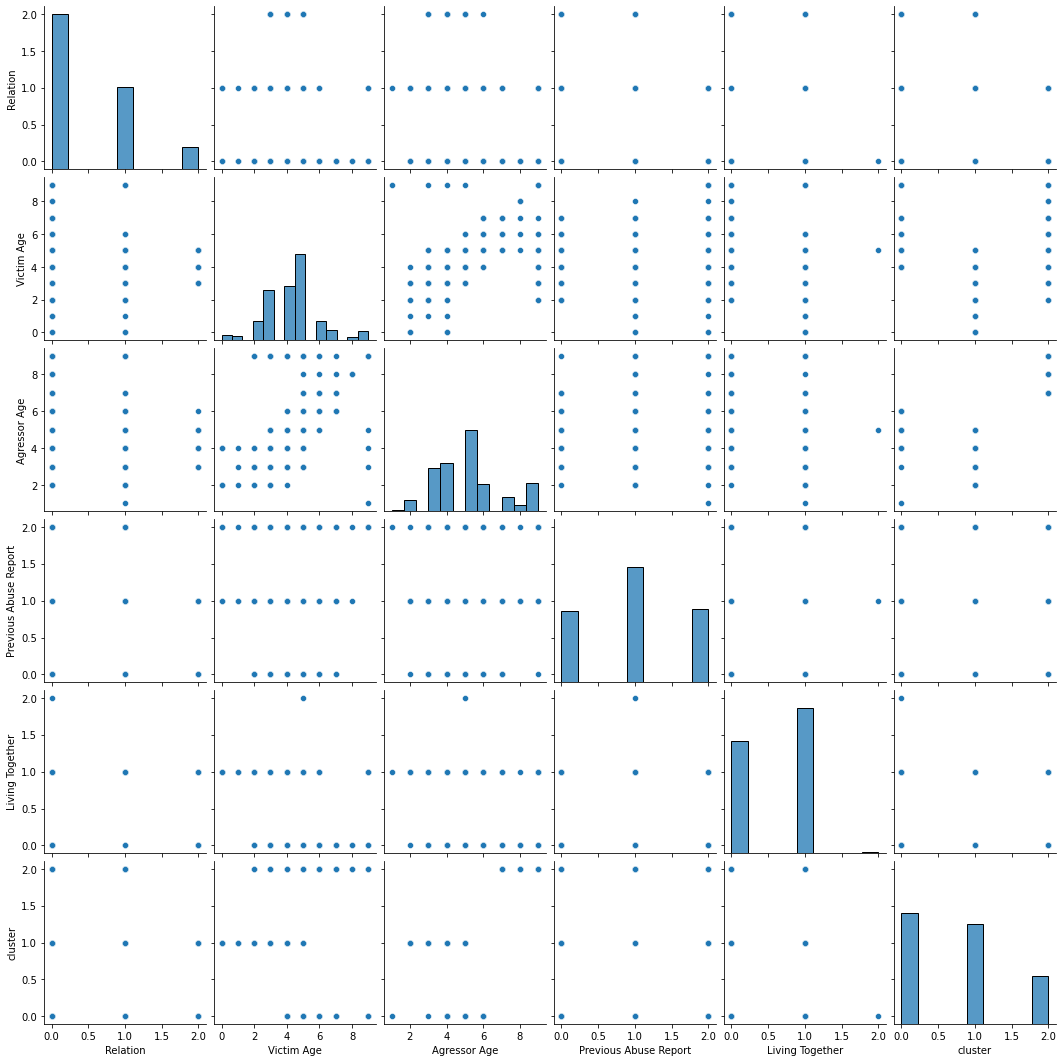

In [ ]:
sns.pairplot(encoded_vra_dset)
plt.show()

# Model Development

## Data Preparation

### Set Model Development Dataset

In [ ]:
model_vra_dset = encoded_vra_dset.copy()
model_vra_dset.head()

,Relation,Victim Age,Agressor Age,Previous Abuse Report,Living Together,cluster
0,0,4,5,2,0,0
1,1,5,5,2,1,0
2,0,9,4,2,0,0
3,1,2,9,2,1,2
4,1,5,9,2,1,2


In [ ]:
x = model_vra_dset.drop(columns=['cluster'])
y = model_vra_dset['cluster']

# Inspect train and test dataset
print('X data : {}'.format(x.shape))
print('Y data : {}'.format(y.shape))

X data : (205, 5)
Y data : (205,)


### Split Dataset

In [ ]:
# Split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2, stratify=y)

# Inspect train and test dataset
print('Cluster Distribution in Train Data')
print(y_train.value_counts())
print('X train : {}'.format(x_train.shape))
print('Y train : {}'.format(y_train.shape))
print('----------------------------------------------')
print('Cluster Distribution in Test Data')
print(y_test.value_counts())
print('X test : {}'.format(x_test.shape))
print('Y test : {}'.format(y_test.shape))

Cluster Distribution in Train Data
0    71
1    63
2    30
Name: cluster, dtype: int64
X train : (164, 5)
Y train : (164,)
----------------------------------------------
Cluster Distribution in Test Data
0    17
1    16
2     8
Name: cluster, dtype: int64
X test : (41, 5)
Y test : (41,)


### Standardize Data

In [ ]:
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [ ]:
x_train.sample(3)

,Relation,Victim Age,Agressor Age,Previous Abuse Report,Living Together
111,-0.772761,-0.865125,-1.108036,1.302622,0.821246
160,-0.772761,0.374006,-0.570409,-0.040963,0.821246
11,2.356445,0.374006,-0.570409,-0.040963,0.821246


In [ ]:
x_test.sample(3)

,Relation,Victim Age,Agressor Age,Previous Abuse Report,Living Together
32,2.356445,0.374006,-0.570409,-1.384548,-1.159407
9,2.356445,-0.865125,-0.570409,-1.384548,0.821246
38,-0.772761,0.374006,-0.570409,1.302622,-1.159407


### Modeling

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

##### Parameter Tuning

In [ ]:
dt_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(3,10),
    'min_samples_split' : range(3,10),
    'min_samples_leaf' : range(3,5),
    'random_state' : [0]
}

In [ ]:
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=dt_param, cv=10, scoring='f1_macro')
dt_grid.fit(x_train, y_train)
print(dt_grid.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 3, 'random_state': 0}


##### Develop Model

In [ ]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=3, min_samples_split=3, random_state=0)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
all_interval = []
for i in range(100):
  start = datetime.datetime.now()
  y_train_pred = dt_model.predict(x_train)
  end = datetime.datetime.now()
  interval = end - start
  all_interval.append(interval.microseconds)
  
print('Execution Time : {} microseconds'.format(sum(all_interval)/100))

Execution Time : 569.69 microseconds


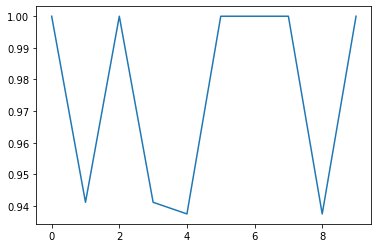

In [ ]:
train_cv = cross_val_score(dt_model, x_train, y_train, cv=10)
sns.lineplot(x=range(len(train_cv)), y=train_cv)
plt.show()

In [ ]:
print(classification_report(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        71
           1       0.97      1.00      0.98        63
           2       1.00      1.00      1.00        30

    accuracy                           0.99       164
   macro avg       0.99      0.99      0.99       164
weighted avg       0.99      0.99      0.99       164

0.9878048780487805


##### Evaluate Model

In [ ]:
all_interval = []
for i in range(100):
  start = datetime.datetime.now()
  y_test_pred = dt_model.predict(x_test)
  end = datetime.datetime.now()
  interval = end - start
  all_interval.append(interval.microseconds)
  
print('Execution Time : {} microseconds'.format(sum(all_interval)/100))

Execution Time : 597.55 microseconds


In [ ]:
print(classification_report(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         8

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

1.0


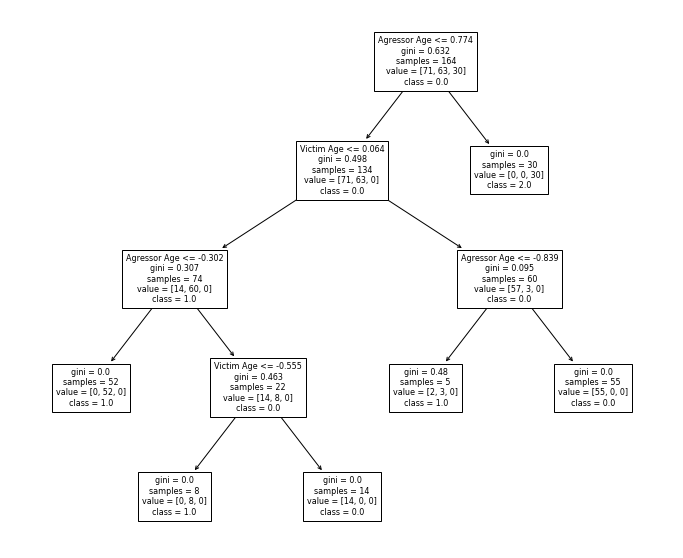

In [ ]:
plt.figure(figsize=(12,10))
columns = model_vra_dset.columns[:-1]
label = ['0.0','1.0','2.0']
tree.plot_tree(dt_model, feature_names=columns, class_names=label, fontsize=8)
plt.show()

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

##### Parameter Tuning

In [ ]:
lr_param = {
    'penalty' : ['l1','l2'],
    'C' :  np.logspace(-4,4,20),
    'solver' : ['newton-cg', 'lbfgs', 'sag', 'saga']
}

In [ ]:
lr_grid = GridSearchCV(LogisticRegression(random_state=0), param_grid=lr_param, cv=10, scoring='f1_macro')
lr_grid.fit(x_train, y_train)
print(lr_grid.best_params_)

##### Develop Model

In [ ]:
lr_model = LogisticRegression(C=0.23357214690901212, penalty='l1', solver='saga', random_state=0)
lr_model.fit(x_train, y_train)

LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
all_interval = []
for i in range(100):
  start = datetime.datetime.now()
  y_train_pred = lr_model.predict(x_train)
  end = datetime.datetime.now()
  interval = end - start
  all_interval.append(interval.microseconds)
  
print('Execution Time : {} microseconds'.format(sum(all_interval)/100))

Execution Time : 663.0 microseconds


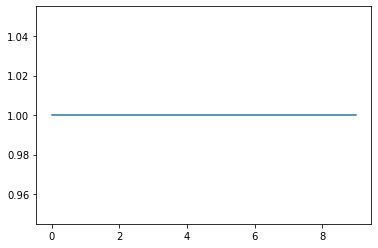

In [ ]:
train_cv = cross_val_score(lr_model, x_train, y_train, cv=10)
sns.lineplot(x=range(len(train_cv)), y=train_cv)
plt.show()

In [ ]:
print(classification_report(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        30

    accuracy                           1.00       164
   macro avg       1.00      1.00      1.00       164
weighted avg       1.00      1.00      1.00       164

1.0


##### Evaluate Model

In [ ]:
all_interval = []
for i in range(100):
  start = datetime.datetime.now()
  y_test_pred = lr_model.predict(x_test)
  end = datetime.datetime.now()
  interval = end - start
  all_interval.append(interval.microseconds)
  
print('Execution Time : {} microseconds'.format(sum(all_interval)/100))

Execution Time : 509.32 microseconds


In [ ]:
print(classification_report(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         8

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

1.0


#### K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

##### Parameter Tuning

In [ ]:
knn_param = {
    'n_neighbors' : range(3,20),
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

In [ ]:
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=knn_param, cv=10, scoring='f1_macro')
knn_grid.fit(x_train, y_train)
print(knn_grid.best_params_)

{'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'distance'}


##### Develop Model

In [ ]:
knn_model = KNeighborsClassifier(metric='manhattan', n_neighbors=18, weights='distance')
knn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='distance')

In [ ]:
all_interval = []
for i in range(100):
  start = datetime.datetime.now()
  y_train_pred = knn_model.predict(x_train)
  end = datetime.datetime.now()
  interval = end - start
  all_interval.append(interval.microseconds)
  
print('Execution Time : {} microseconds'.format(sum(all_interval)/100))

Execution Time : 2426.46 microseconds


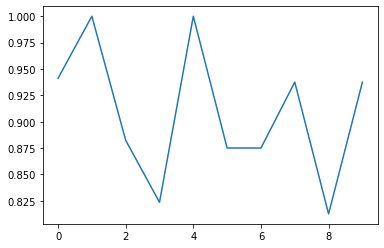

In [ ]:
train_cv = cross_val_score(knn_model, x_train, y_train, cv=10)
sns.lineplot(x=range(len(train_cv)), y=train_cv)
plt.show()

In [ ]:
print(classification_report(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        30

    accuracy                           1.00       164
   macro avg       1.00      1.00      1.00       164
weighted avg       1.00      1.00      1.00       164

1.0


##### Evaluate Model

In [ ]:
all_interval = []
for i in range(100):
  start = datetime.datetime.now()
  y_test_pred = knn_model.predict(x_test)
  end = datetime.datetime.now()
  interval = end - start
  all_interval.append(interval.microseconds)
  
print('Execution Time : {} microseconds'.format(sum(all_interval)/100))

Execution Time : 4254.76 microseconds


In [ ]:
print(classification_report(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       1.00      0.94      0.97        16
           2       1.00      0.75      0.86         8

    accuracy                           0.93        41
   macro avg       0.95      0.90      0.91        41
weighted avg       0.94      0.93      0.93        41

0.926829268292683


#### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

##### Parameter Tuning

In [ ]:
svm_param = {
   'C' :  np.logspace(-4,4,20),
   'kernel' : ['linear', 'poly', 'rbf'],
   'gamma' : ['scale', 'auto'],
   'decision_function_shape' : ['ovo', 'ovr']
}

In [ ]:
svm_grid = GridSearchCV(SVC(random_state=0), param_grid=svm_param, cv=10, scoring='f1_macro')
svm_grid.fit(x_train, y_train)
print(svm_grid.best_params_)

{'C': 1.623776739188721, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear'}


##### Develop Model

In [ ]:
svm_model = SVC(C=1.623776739188721, decision_function_shape='ovo', gamma='scale', kernel= 'linear')
svm_model.fit(x_train, y_train)

SVC(C=1.623776739188721, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovo', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
all_interval = []
for i in range(100):
  start = datetime.datetime.now()
  y_train_pred = svm_model.predict(x_train)
  end = datetime.datetime.now()
  interval = end - start
  all_interval.append(interval.microseconds)
  
print('Execution Time : {} microseconds'.format(sum(all_interval)/100))

Execution Time : 729.0 microseconds


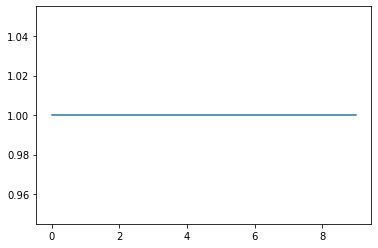

In [ ]:
train_cv = cross_val_score(svm_model, x_train, y_train, cv=10)
sns.lineplot(x=range(len(train_cv)), y=train_cv)
plt.show()

In [ ]:
print(classification_report(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        30

    accuracy                           1.00       164
   macro avg       1.00      1.00      1.00       164
weighted avg       1.00      1.00      1.00       164

1.0


##### Evaluate Model

In [ ]:
all_interval = []
for i in range(100):
  start = datetime.datetime.now()
  y_test_pred = svm_model.predict(x_test)
  end = datetime.datetime.now()
  interval = end - start
  all_interval.append(interval.microseconds)
  
print('Execution Time : {} microseconds'.format(sum(all_interval)/100))

Execution Time : 579.71 microseconds


In [ ]:
print(classification_report(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         8

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

1.0


#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

##### Develop Model

In [ ]:
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
all_interval = []
for i in range(100):
  start = datetime.datetime.now()
  y_train_pred = gnb_model.predict(x_train)
  end = datetime.datetime.now()
  interval = end - start
  all_interval.append(interval.microseconds)
  
print('Execution Time : {} microseconds'.format(sum(all_interval)/100))

Execution Time : 692.2 microseconds


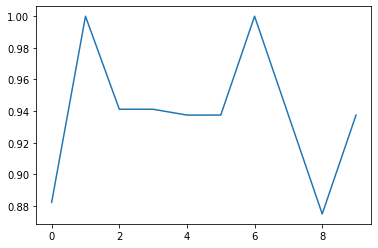

In [ ]:
train_cv = cross_val_score(gnb_model, x_train, y_train, cv=10)
sns.lineplot(x=range(len(train_cv)), y=train_cv)
plt.show()

In [ ]:
print(classification_report(y_train, y_train_pred))
print(accuracy_score(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.97      0.98        63
           2       1.00      0.93      0.97        30

    accuracy                           0.98       164
   macro avg       0.98      0.97      0.97       164
weighted avg       0.98      0.98      0.98       164

0.975609756097561


##### Evaluate Model

In [ ]:
all_interval = []
for i in range(100):
  start = datetime.datetime.now()
  y_test_pred = gnb_model.predict(x_test)
  end = datetime.datetime.now()
  interval = end - start
  all_interval.append(interval.microseconds)
  
print('Execution Time : {} microseconds'.format(sum(all_interval)/100))

Execution Time : 771.31 microseconds


In [ ]:
print(classification_report(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       1.00      0.88      0.93        16
           2       1.00      0.88      0.93         8

    accuracy                           0.93        41
   macro avg       0.95      0.92      0.93        41
weighted avg       0.94      0.93      0.93        41

0.926829268292683


#### Deep Learning

##### Dataset Adjusment

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

##### Parameter Tuning

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(3, activation=tf.nn.softmax, input_dim=len(x_train.columns)),
])  

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-8),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 3)                 18        
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x=x_train, y=y_train, batch_size=16,
                    validation_data=(x_test, y_test),
                    epochs=200, callbacks=[lr_schedule])

Epoch 1/200
11/11 [==============================] - 1s 25ms/step - loss: 1.3819 - accuracy: 0.2828 - val_loss: 1.3873 - val_accuracy: 0.2195
Epoch 2/200
11/11 [==============================] - 0s 8ms/step - loss: 1.4398 - accuracy: 0.2172 - val_loss: 1.3873 - val_accuracy: 0.2195
Epoch 3/200
11/11 [==============================] - 0s 7ms/step - loss: 1.3666 - accuracy: 0.3157 - val_loss: 1.3873 - val_accuracy: 0.2195
Epoch 4/200
11/11 [==============================] - 0s 6ms/step - loss: 1.3844 - accuracy: 0.3017 - val_loss: 1.3873 - val_accuracy: 0.2195
Epoch 5/200
11/11 [==============================] - 0s 7ms/step - loss: 1.3391 - accuracy: 0.2949 - val_loss: 1.3873 - val_accuracy: 0.2195
Epoch 6/200
11/11 [==============================] - 1s 58ms/step - loss: 1.3815 - accuracy: 0.2939 - val_loss: 1.3873 - val_accuracy: 0.2195
Epoch 7/200
11/11 [==============================] - 0s 7ms/step - loss: 1.3179 - accuracy: 0.2991 - val_loss: 1.3873 - val_accuracy: 0.2195
Epoch 8/200

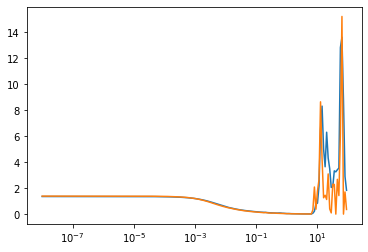

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.semilogx(history.history["lr"], history.history["val_loss"])
plt.show()

##### Develop Model

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(3, activation=tf.nn.softmax, input_dim=len(x_train.columns)),
])  

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 3)                 18        
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x=x_train, y=y_train,
                    validation_data=(x_test, y_test),
                    epochs=100, batch_size=16)

Epoch 1/100
11/11 [==============================] - 1s 21ms/step - loss: 1.0883 - accuracy: 0.5513 - val_loss: 0.4302 - val_accuracy: 0.8049
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.4232 - accuracy: 0.8680 - val_loss: 0.2591 - val_accuracy: 0.9268
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 0.3196 - accuracy: 0.9135 - val_loss: 0.1986 - val_accuracy: 0.9512
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 0.2241 - accuracy: 0.9646 - val_loss: 0.1790 - val_accuracy: 0.9512
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 0.1794 - accuracy: 0.9673 - val_loss: 0.1502 - val_accuracy: 0.9512
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 0.1465 - accuracy: 0.9861 - val_loss: 0.1398 - val_accuracy: 1.0000
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 0.1497 - accuracy: 1.0000 - val_loss: 0.1156 - val_accuracy: 1.0000
Epoch 8/100


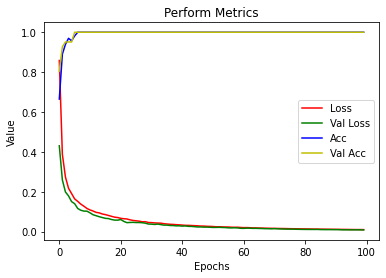

<Figure size 432x288 with 0 Axes>

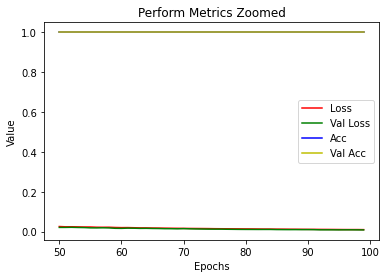

<Figure size 432x288 with 0 Axes>

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(loss)) # Get number of epochs

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'g')
plt.plot(epochs, acc, 'b')
plt.plot(epochs, val_acc, 'y')
plt.title('Perform Metrics')
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend(["Loss",'Val Loss', 'Acc', 'Val Acc'])
plt.figure()
plt.show()

# ---------------- Zoom ----------------
zoomed_loss = loss[50:]
zoomed_val_loss = val_loss[50:]
zoomed_acc = acc[50:]
zoomed_val_acc = val_acc[50:]
zoomed_epochs = range(50,100)
plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.plot(zoomed_epochs, zoomed_val_loss, 'g')
plt.plot(zoomed_epochs, zoomed_acc, 'b')
plt.plot(zoomed_epochs, zoomed_val_acc, 'y')
plt.title('Perform Metrics Zoomed')
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend(["Loss",'Val Loss', 'Acc', 'Val Acc'])
plt.figure()
plt.show()

##### Evaluate Model

###### Train Data

In [ ]:
all_interval = []
for i in range(100):
  start = datetime.datetime.now()
  y_train_pred = model.predict(x_train)
  y_train_pred = np.argmax(y_train_pred, axis=1)
  end = datetime.datetime.now()
  interval = end - start
  all_interval.append(interval.microseconds)
  
print('Execution Time : {} microseconds'.format(sum(all_interval)/100))

Execution Time : 67561.11 microseconds


In [ ]:
print(classification_report(np.argmax(y_train, axis=1), y_train_pred))
print(accuracy_score(np.argmax(y_train, axis=1), y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        30

    accuracy                           1.00       164
   macro avg       1.00      1.00      1.00       164
weighted avg       1.00      1.00      1.00       164

1.0


###### Test Data

In [ ]:
all_interval = []
for i in range(100):
  start = datetime.datetime.now()
  y_test_pred = model.predict(x_test)
  y_test_pred = np.argmax(y_test_pred, axis=1)
  end = datetime.datetime.now()
  interval = end - start
  all_interval.append(interval.microseconds)
  
print('Execution Time : {} microseconds'.format(sum(all_interval)/100))

Execution Time : 64711.73 microseconds


In [ ]:
print(classification_report(np.argmax(y_test, axis=1), y_test_pred))
print(accuracy_score(np.argmax(y_test, axis=1), y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         8

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

1.0


# Performance Comparison

In [ ]:
checkpoint = datetime.datetime.now()
PerformanceComparison = [
  [checkpoint, 'Decision Tree', 0.9878048780487805, 1.0, 569.69, 597.55],
  [checkpoint, 'Logistic Regression', 1.0, 1.0, 663.0, 509.32],
  [checkpoint, 'K-Nearest Neighbors', 1.0, 0.926829268292683, 2426.46, 4254.76],
  [checkpoint, 'Support Vector Machine', 1.0, 1.0, 729.0, 579.71],
  [checkpoint, 'Gaussian Naive Bayes', 0.975609756097561, 0.926829268292683, 771.31, 692.2],
  [checkpoint, 'Deep Learning', 1.0, 1.0, 67561.11, 64711.73]
]

perform_comparison = pd.DataFrame(PerformanceComparison, columns=['checkpoint', 'algorithm', 'train_acc', 'test_acc', 'train_predict_time_microseconds', 'test_predict_time_microseconds'])
perform_comparison

,checkpoint,algorithm,train_acc,test_acc,train_predict_time_microseconds,test_predict_time_microseconds
0,2021-05-17 10:52:28.342850,Decision Tree,0.987805,1.000000,569.69,597.55
1,2021-05-17 10:52:28.342850,Logistic Regression,1.000000,1.000000,663.00,509.32
2,2021-05-17 10:52:28.342850,K-Nearest Neighbors,1.000000,0.926829,2426.46,4254.76
3,2021-05-17 10:52:28.342850,Support Vector Machine,1.000000,1.000000,729.00,579.71
4,2021-05-17 10:52:28.342850,Gaussian Naive Bayes,0.975610,0.926829,771.31,692.20
5,2021-05-17 10:52:28.342850,Deep Learning,1.000000,1.000000,67561.11,64711.73


In [370]:
perform_comparison.to_excel('/content/drive/MyDrive/Bangkit Academy/Final Project - Capstone/04 Models/perform_comparison.xlsx', index=False)

# Save Model

In [ ]:
import pickle

In [ ]:
root_dir = '/content/drive/MyDrive/Bangkit Academy/Final Project - Capstone/04 Models/'

pickle.dump(dt_model, open(root_dir+'decision_tree_model_'+str(checkpoint)+'.h5', 'wb'))
pickle.dump(lr_model, open(root_dir+'logistic_regression_model_'+str(checkpoint)+'.h5', 'wb'))
pickle.dump(knn_model, open(root_dir+'knearest_neighbors_model_'+str(checkpoint)+'.h5', 'wb'))
pickle.dump(svm_model, open(root_dir+'support_vector_machine_model_'+str(checkpoint)+'.h5', 'wb'))
pickle.dump(gnb_model, open(root_dir+'gaussian_naive_bayes_model_'+str(checkpoint)+'.h5', 'wb'))
model.save(root_dir+'deep_learning_1_layer_'+str(checkpoint)+'.h5')